# Lab 5
## Dijkstra and Floyd

In [1]:
import heapq
import sys
import networkx as nx
import matplotlib.pyplot as plt
import timeit
import random
from math import ceil

In [2]:
def create_dense_graph(num_nodes):
    graph = nx.complete_graph(num_nodes)
    for source, target in graph.edges:
        weight = random.randint(1, 10)
        graph.edges[source, target]['weight'] = weight
    return graph

def create_sparse_graph(num_nodes, num_edges):
    graph = nx.Graph()
    for i in range(num_nodes):
        graph.add_node(i)
    while graph.number_of_edges() < num_edges:
        source = random.randint(0, num_nodes-1)
        target = random.randint(0, num_nodes-1)
        if source != target and not graph.has_edge(source, target):
            weight = random.randint(1, 10)
            graph.add_edge(source, target, weight=weight)
    return graph

In [3]:
def dijkstra(graph):
    all_distances = {}
    
    for start in graph:
        distances = {vertex: sys.maxsize for vertex in graph}
        distances[start] = 0
        queue = [(0, start)]
        
        while queue:
            current_distance, current_vertex = heapq.heappop(queue)
            if current_distance > distances[current_vertex]:
                continue
            for neighbor in graph[current_vertex]:
                weight = graph[current_vertex][neighbor]['weight']
                distance = current_distance + weight
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    heapq.heappush(queue, (distance, neighbor))
        
        all_distances[start] = distances
    
    return all_distances


def floyd(graph):
    num_nodes = len(graph)
    distances = [[sys.maxsize] * num_nodes for _ in range(num_nodes)]
    for i in range(num_nodes):
        for j in range(num_nodes):
            if i == j:
                distances[i][j] = 0
            elif graph.has_edge(i, j):
                distances[i][j] = graph[i][j]['weight']
    
    for k in range(num_nodes):
        for i in range(num_nodes):
            for j in range(num_nodes):
                distances[i][j] = min(distances[i][j], distances[i][k] + distances[k][j])
    
    return distances


In [4]:
def visualize_graph(graph):
    pos = nx.spring_layout(graph)  # Positions for nodes
    labels = nx.get_edge_attributes(graph, 'weight')  # Edge weights as labels
    nx.draw_networkx(graph, pos=pos, with_labels=True)
    nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels)
    plt.show()

In [5]:
def analyze_algorithms_dense(algorithm1, algorithm2, graph_generator, num_nodes_range):
    algs = [algorithm1, algorithm2]
    times = []
    for algorithm in algs:
        execution_times = []
        for num_nodes in num_nodes_range:
            graph = graph_generator(num_nodes)
            start_time = timeit.default_timer()
            algorithm(graph)
            end_time = timeit.default_timer()
            execution_times.append(end_time - start_time)
        times.append(execution_times)
    
    plt.plot(num_nodes_range, times[0], label='Dijkstra')
    plt.plot(num_nodes_range, times[1], label='Floyd')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Algorithm Performance Analysis')
    plt.legend()
    plt.show() 

def analyze_algorithms_sparse(algorithm1, algorithm2, graph_generator, num_nodes_range, num_edges):
    algs = [algorithm1, algorithm2]
    times = []
    for algorithm in algs:
        execution_times = []
        edge_index = 0
        for num_nodes in num_nodes_range:
            graph = graph_generator(num_nodes, num_edges[edge_index])
            start_time = timeit.default_timer()
            algorithm(graph)
            end_time = timeit.default_timer()
            execution_times.append(end_time - start_time)
            edge_index += 1
        times.append(execution_times)

    plt.plot(num_nodes_range, times[0], label='Dijkstra')
    plt.plot(num_nodes_range, times[1], label='Floyd')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Algorithm Performance Analysis')
    plt.legend()
    plt.show()


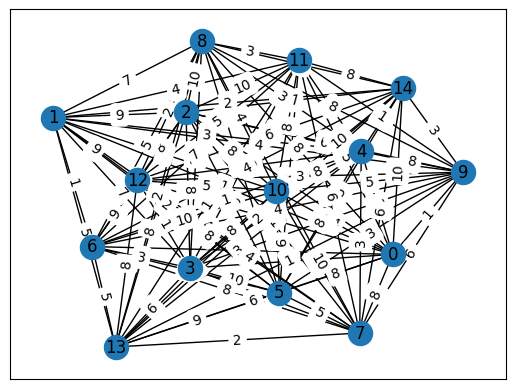

In [6]:
visualize_graph(create_dense_graph(15))

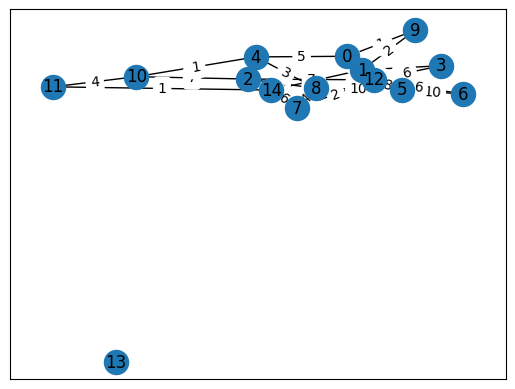

In [7]:
visualize_graph(create_sparse_graph(15, 23))

In [8]:
dijkstra(create_dense_graph(10))

{0: {0: 0, 1: 5, 2: 6, 3: 5, 4: 6, 5: 4, 6: 3, 7: 4, 8: 4, 9: 5},
 1: {0: 5, 1: 0, 2: 5, 3: 4, 4: 3, 5: 1, 6: 3, 7: 4, 8: 2, 9: 3},
 2: {0: 6, 1: 5, 2: 0, 3: 1, 4: 2, 5: 5, 6: 3, 7: 2, 8: 3, 9: 2},
 3: {0: 5, 1: 4, 2: 1, 3: 0, 4: 1, 5: 4, 6: 2, 7: 1, 8: 3, 9: 3},
 4: {0: 6, 1: 3, 2: 2, 3: 1, 4: 0, 5: 4, 6: 3, 7: 2, 8: 4, 9: 4},
 5: {0: 4, 1: 1, 2: 5, 3: 4, 4: 4, 5: 0, 6: 4, 7: 5, 8: 3, 9: 3},
 6: {0: 3, 1: 3, 2: 3, 3: 2, 4: 3, 5: 4, 6: 0, 7: 1, 8: 1, 9: 2},
 7: {0: 4, 1: 4, 2: 2, 3: 1, 4: 2, 5: 5, 6: 1, 7: 0, 8: 2, 9: 3},
 8: {0: 4, 1: 2, 2: 3, 3: 3, 4: 4, 5: 3, 6: 1, 7: 2, 8: 0, 9: 1},
 9: {0: 5, 1: 3, 2: 2, 3: 3, 4: 4, 5: 3, 6: 2, 7: 3, 8: 1, 9: 0}}

In [9]:
floyd(create_dense_graph(10))

[[0, 2, 3, 2, 4, 1, 2, 3, 1, 3],
 [2, 0, 3, 3, 4, 3, 4, 4, 1, 5],
 [3, 3, 0, 3, 3, 3, 2, 1, 2, 3],
 [2, 3, 3, 0, 5, 1, 2, 3, 2, 3],
 [4, 4, 3, 5, 0, 5, 5, 4, 3, 6],
 [1, 3, 3, 1, 5, 0, 1, 2, 2, 2],
 [2, 4, 2, 2, 5, 1, 0, 1, 3, 1],
 [3, 4, 1, 3, 4, 2, 1, 0, 3, 2],
 [1, 1, 2, 2, 3, 2, 3, 3, 0, 4],
 [3, 5, 3, 3, 6, 2, 1, 2, 4, 0]]

In [10]:
nodes = [10, 50, 80, 100, 150, 200, 250, 300, 350]
vertices_sparse = [ceil(x * 1.5) for x in nodes]

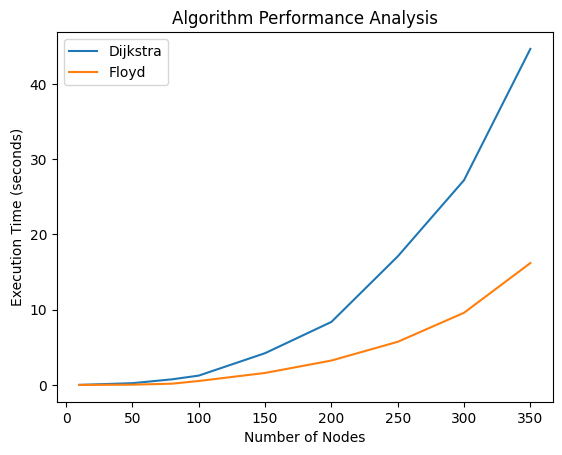

In [11]:
analyze_algorithms_dense(dijkstra, floyd, create_dense_graph, nodes)

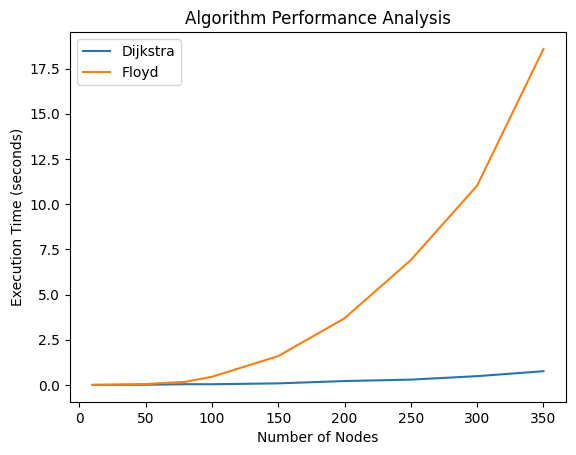

In [12]:
analyze_algorithms_sparse(dijkstra, floyd, create_sparse_graph, nodes, vertices_sparse)